# MMM Transformer. Генерация семплов.

In [2]:
from transformers import GPT2LMHeadModel
from transformers import PreTrainedTokenizerFast
from tokenizers import Tokenizer
import os
from source.helpers.samplinghelpers import *


# Загрузка валидационного набора
validation_data_path = os.path.join("datasets", "jsb_mmmtrack", "token_sequences_train.txt")

# Токенайзер
tokenizer_path = os.path.join("datasets", "jsb_mmmtrack", "tokenizer.json")
tokenizer = Tokenizer.from_file(tokenizer_path)
tokenizer = PreTrainedTokenizerFast(tokenizer_file=tokenizer_path)
tokenizer.add_special_tokens({'pad_token': '[PAD]'})

# Подгружаем модель
model_path = os.path.join("training", "jsb_mmmtrack", "best_model")
model = GPT2LMHeadModel.from_pretrained(model_path)

print("Model loaded.")

c:\Users\User\anaconda3\lib\site-packages\pydub\utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


Model loaded.


Генерация семплов с использованием валидационного набора

In [3]:
for i in range(5):
    ##Выбираем рандомный образец и оставляем лишь часть одной дорожки
    priming_sample, priming_sample_original = get_priming_token_sequence(
        validation_data_path,
        stop_on_track_end=0,
        stop_after_n_tokens=20,
        return_original=True
    )
    #генерация
    generated_sample = generate(model, tokenizer, priming_sample)

    midi_path = os.path.join('samples','inter_samples','sample_{}.mid'.format(i))

    print("Оригинальный семпл")
    render_token_sequence(priming_sample_original, midi_path, use_program=False)

    print("Урезанная часть")
    render_token_sequence(priming_sample,midi_path, use_program=False)

    print("Сгенерированный семпл")
    render_token_sequence(generated_sample,midi_path, use_program=False)
    

Оригинальный семпл


Loading BokehJS ...

Урезанная часть


Loading BokehJS ...

Сгенерированный семпл


Loading BokehJS ...

Оригинальный семпл


Loading BokehJS ...

Урезанная часть


Loading BokehJS ...

Сгенерированный семпл


Loading BokehJS ...

Оригинальный семпл


Loading BokehJS ...

Урезанная часть


Loading BokehJS ...

Сгенерированный семпл


Loading BokehJS ...

Оригинальный семпл


Loading BokehJS ...

Урезанная часть


Loading BokehJS ...

Сгенерированный семпл


Loading BokehJS ...

Оригинальный семпл


Loading BokehJS ...

Урезанная часть


Loading BokehJS ...

Сгенерированный семпл


Loading BokehJS ...

Генерация без использования валидационного набора

In [16]:
for i in range(10):

    generated_sample = generate_from_scratch(model, tokenizer)
    midi_path = os.path.join('samples','from_scratch_samples','sample_{}.mid'.format(i))
    print("Сгенерированный семпл")
    render_token_sequence(generated_sample,midi_path, use_program=False)
    
    print(generated_sample)

Сгенерированный семпл


Loading BokehJS ...

PIECE_START TRACK_START INST=6 DENSITY=4 BAR_START NOTE_ON=25 TIME_DELTA=2.0 NOTE_OFF=27 NOTE_ON=30 TIME_DELTA=2.0 NOTE_OFF=30 NOTE_ON=30 TIME_DELTA=2.0 NOTE_OFF=30 NOTE_ON=30 TIME_DELTA=2.0 NOTE_OFF=30 NOTE_ON=30 TIME_DELTA=2.0 NOTE_OFF=30 NOTE_ON=35 TIME_DELTA=2.0 NOTE_OFF=35 NOTE_ON=37 TIME_DELTA=2.0 NOTE_OFF=37 NOTE_ON=35 TIME_DELTA=2.0 NOTE_OFF=35 BAR_END BAR_START NOTE_ON=30 TIME_DELTA=2.0 NOTE_OFF=30 NOTE_ON=35 TIME_DELTA=2.0 NOTE_OFF=35 NOTE_ON=37 TIME_DELTA=2.0 NOTE_OFF=37 NOTE_ON=39 TIME_DELTA=2.0 NOTE_OFF=39 NOTE_ON=40 TIME_DELTA=2.0 NOTE_OFF=40 NOTE_ON=42 TIME_DELTA=2.0 NOTE_OFF=42 NOTE_ON=35 TIME_DELTA=2.0 NOTE_OFF=35 BAR_END TRACK_END TRACK_START INST=2 DENSITY=4 BAR_START NOTE_ON=49 TIME_DELTA=2.0 NOTE_OFF=49 NOTE_ON=51 TIME_DELTA=2.0 NOTE_OFF=51 NOTE_ON=49 TIME_DELTA=2.0 NOTE_OFF=49 NOTE_ON=47 TIME_DELTA=2.0 NOTE_OFF=47 NOTE_ON=46 TIME_DELTA=2.0 NOTE_OFF=46 NOTE_ON=47 TIME_DELTA=2.0 NOTE_OFF=47 NOTE_ON=49 TIME_DELTA=2.0 NOTE_OFF=49 NOTE_ON=51 TIME_DELTA=2.0 NOTE_OFF=51 

Loading BokehJS ...

PIECE_START TRACK_START INST=11 DENSITY=0 BAR_START NOTE_ON=51 TIME_DELTA=12.0 NOTE_OFF=51 BAR_END BAR_START NOTE_ON=51 TIME_DELTA=4.0 NOTE_OFF=51 NOTE_ON=51 TIME_DELTA=4.0 NOTE_OFF=51 NOTE_ON=51 TIME_DELTA=4.0 NOTE_OFF=51 NOTE_ON=51 TIME_DELTA=4.0 NOTE_OFF=51 BAR_END TRACK_END TRACK_START INST=2 DENSITY=0 BAR_START NOTE_ON=46 TIME_DELTA=12.0 NOTE_OFF=46 BAR_END BAR_START NOTE_ON=46 TIME_DELTA=4.0 NOTE_OFF=46 NOTE_ON=46 TIME_DELTA=4.0 NOTE_OFF=46 NOTE_ON=46 TIME_DELTA=4.0 NOTE_OFF=46 NOTE_ON=46 TIME_DELTA=4.0 NOTE_OFF=46 BAR_END TRACK_END TRACK_START INST=3 DENSITY=0 BAR_START NOTE_ON=39 TIME_DELTA=12.0 NOTE_OFF=39 BAR_END BAR_START NOTE_ON=39 TIME_DELTA=4.0 NOTE_OFF=39 NOTE_ON=38 TIME_DELTA=4.0 NOTE_OFF=38 NOTE_ON=39 TIME_DELTA=4.0 NOTE_OFF=39 NOTE_ON=39 TIME_DELTA=4.0 NOTE_OFF=39 BAR_END TRACK_END TRACK_START INST=0 DENSITY=0 BAR_START NOTE_ON=51 TIME_DELTA=12.0 NOTE_OFF=51 BAR_END BAR_START NOTE_ON=55 TIME_DELTA=4.0 NOTE_OFF=55 NOTE_ON=53 TIME_DELTA=4.0 NOTE_OFF=53 NOTE_ON=55 TIME_D

Loading BokehJS ...

PIECE_START TRACK_START INST=1 DENSITY=0 BAR_START NOTE_ON=85 TIME_DELTA=1.0 NOTE_OFF=85 NOTE_ON=83 TIME_DELTA=1.0 NOTE_OFF=83 NOTE_ON=82 TIME_DELTA=4.0 NOTE_OFF=82 BAR_END BAR_START NOTE_ON=83 TIME_DELTA=4.0 NOTE_OFF=83 NOTE_ON=82 TIME_DELTA=4.0 NOTE_OFF=82 NOTE_ON=83 TIME_DELTA=4.0 NOTE_OFF=83 NOTE_ON=82 TIME_DELTA=4.0 NOTE_OFF=82 BAR_END TRACK_END TRACK_START INST=2 DENSITY=1 BAR_START NOTE_ON=73 TIME_DELTA=4.0 NOTE_OFF=73 NOTE_ON=73 TIME_DELTA=4.0 NOTE_OFF=73 BAR_END BAR_START NOTE_ON=75 TIME_DELTA=4.0 NOTE_OFF=75 NOTE_ON=73 TIME_DELTA=4.0 NOTE_OFF=73 NOTE_ON=73 TIME_DELTA=4.0 NOTE_OFF=73 NOTE_ON=73 TIME_DELTA=4.0 NOTE_OFF=73 BAR_END TRACK_END TRACK_START INST=3 DENSITY=1 BAR_START NOTE_ON=66 TIME_DELTA=4.0 NOTE_OFF=66 BAR_END BAR_START NOTE_ON=68 TIME_DELTA=4.0 NOTE_OFF=68 NOTE_ON=66 TIME_DELTA=4.0 NOTE_OFF=66 NOTE_ON=65 TIME_DELTA=4.0 NOTE_OFF=65 NOTE_ON=66 TIME_DELTA=2.0 NOTE_OFF=66 NOTE_ON=65 TIME_DELTA=2.0 NOTE_OFF=65 BAR_END TRACK_END TRACK_START INST=0 DENSITY=0 BAR_START NO

Loading BokehJS ...

PIECE_START TRACK_START INST=14 DENSITY=3 BAR_START NOTE_ON=85 TIME_DELTA=1.0 NOTE_OFF=85 NOTE_ON=83 TIME_DELTA=1.0 NOTE_OFF=83 NOTE_ON=82 TIME_DELTA=4.0 NOTE_OFF=82 NOTE_ON=83 TIME_DELTA=4.0 NOTE_OFF=83 NOTE_ON=82 TIME_DELTA=4.0 NOTE_OFF=82 BAR_END BAR_START NOTE_ON=83 TIME_DELTA=4.0 NOTE_OFF=83 NOTE_ON=82 TIME_DELTA=4.0 NOTE_OFF=82 NOTE_ON=80 TIME_DELTA=4.0 NOTE_OFF=80 NOTE_ON=78 TIME_DELTA=4.0 NOTE_OFF=78 BAR_END TRACK_END TRACK_START INST=2 DENSITY=4 BAR_START NOTE_ON=73 TIME_DELTA=2.0 NOTE_OFF=73 NOTE_ON=71 TIME_DELTA=2.0 NOTE_OFF=71 NOTE_ON=73 TIME_DELTA=4.0 NOTE_OFF=73 NOTE_ON=75 TIME_DELTA=4.0 NOTE_OFF=75 NOTE_ON=73 TIME_DELTA=4.0 NOTE_OFF=73 BAR_END BAR_START NOTE_ON=75 TIME_DELTA=4.0 NOTE_OFF=75 NOTE_ON=73 TIME_DELTA=4.0 NOTE_OFF=73 NOTE_ON=71 TIME_DELTA=2.0 NOTE_OFF=71 NOTE_ON=70 TIME_DELTA=2.0 NOTE_OFF=70 NOTE_ON=71 TIME_DELTA=4.0 NOTE_OFF=71 BAR_END TRACK_END TRACK_START INST=3 DENSITY=4 BAR_START NOTE_ON=66 TIME_DELTA=2.0 NOTE_OFF=66 NOTE_ON=68 TIME_DELTA=2.0 NOTE_OFF=68 

Loading BokehJS ...

PIECE_START TRACK_START INST=10 DENSITY=3 BAR_START NOTE_ON=62 TIME_DELTA=4.0 NOTE_OFF=62 NOTE_ON=62 TIME_DELTA=4.0 NOTE_OFF=62 NOTE_ON=62 TIME_DELTA=4.0 NOTE_OFF=62 NOTE_ON=62 TIME_DELTA=4.0 NOTE_OFF=62 BAR_END BAR_START NOTE_ON=62 TIME_DELTA=4.0 NOTE_OFF=62 NOTE_ON=62 TIME_DELTA=4.0 NOTE_OFF=62 NOTE_ON=62 TIME_DELTA=4.0 NOTE_OFF=62 NOTE_ON=62 TIME_DELTA=2.0 NOTE_OFF=62 NOTE_ON=60 TIME_DELTA=2.0 NOTE_OFF=60 BAR_END TRACK_END TRACK_START INST=3 DENSITY=4 BAR_START NOTE_ON=50 TIME_DELTA=2.0 NOTE_OFF=50 NOTE_ON=48 TIME_DELTA=2.0 NOTE_OFF=48 NOTE_ON=47 TIME_DELTA=2.0 NOTE_OFF=47 NOTE_ON=45 TIME_DELTA=2.0 NOTE_OFF=45 NOTE_ON=43 TIME_DELTA=4.0 NOTE_OFF=43 NOTE_ON=50 TIME_DELTA=4.0 NOTE_OFF=50 BAR_END BAR_START NOTE_ON=43 TIME_DELTA=4.0 NOTE_OFF=43 NOTE_ON=42 TIME_DELTA=4.0 NOTE_OFF=42 NOTE_ON=43 TIME_DELTA=4.0 NOTE_OFF=43 NOTE_ON=50 TIME_DELTA=2.0 NOTE_OFF=50 NOTE_ON=52 TIME_DELTA=2.0 NOTE_OFF=52 BAR_END TRACK_END TRACK_START INST=2 DENSITY=4 BAR_START NOTE_ON=57 TIME_DELTA=2.0 NOTE_OFF=57 

Loading BokehJS ...

PIECE_START TRACK_START INST=10 DENSITY=3 BAR_START NOTE_ON=46 TIME_DELTA=4.0 NOTE_OFF=46 NOTE_ON=48 TIME_DELTA=4.0 NOTE_OFF=48 NOTE_ON=50 TIME_DELTA=4.0 NOTE_OFF=50 NOTE_ON=50 TIME_DELTA=4.0 NOTE_OFF=50 BAR_END BAR_START NOTE_ON=50 TIME_DELTA=4.0 NOTE_OFF=50 NOTE_ON=50 TIME_DELTA=4.0 NOTE_OFF=50 NOTE_ON=50 TIME_DELTA=4.0 NOTE_OFF=50 NOTE_ON=50 TIME_DELTA=2.0 NOTE_OFF=50 NOTE_ON=48 TIME_DELTA=2.0 NOTE_OFF=48 BAR_END TRACK_END TRACK_START INST=3 DENSITY=4 BAR_START NOTE_ON=38 TIME_DELTA=2.0 NOTE_OFF=38 NOTE_ON=40 TIME_DELTA=2.0 NOTE_OFF=40 NOTE_ON=41 TIME_DELTA=2.0 NOTE_OFF=41 NOTE_ON=43 TIME_DELTA=2.0 NOTE_OFF=43 NOTE_ON=38 TIME_DELTA=4.0 NOTE_OFF=38 NOTE_ON=38 TIME_DELTA=4.0 NOTE_OFF=38 BAR_END BAR_START NOTE_ON=43 TIME_DELTA=4.0 NOTE_OFF=43 NOTE_ON=41 TIME_DELTA=4.0 NOTE_OFF=41 NOTE_ON=46 TIME_DELTA=4.0 NOTE_OFF=46 NOTE_ON=45 TIME_DELTA=2.0 NOTE_OFF=45 NOTE_ON=43 TIME_DELTA=2.0 NOTE_OFF=43 BAR_END TRACK_END TRACK_START INST=2 DENSITY=4 BAR_START NOTE_ON=53 TIME_DELTA=2.0 NOTE_OFF=53 

Loading BokehJS ...

PIECE_START TRACK_START INST=13 DENSITY=2 BAR_START NOTE_ON=62 TIME_DELTA=16.0 NOTE_OFF=62 BAR_END BAR_START NOTE_ON=62 TIME_DELTA=2.0 NOTE_OFF=62 NOTE_ON=64 TIME_DELTA=2.0 NOTE_OFF=64 NOTE_ON=65 TIME_DELTA=4.0 NOTE_OFF=65 NOTE_ON=64 TIME_DELTA=2.0 NOTE_OFF=64 NOTE_ON=62 TIME_DELTA=2.0 NOTE_OFF=62 NOTE_ON=60 TIME_DELTA=4.0 NOTE_OFF=60 NOTE_ON=59 TIME_DELTA=2.0 NOTE_OFF=59 BAR_END TRACK_END TRACK_START INST=3 DENSITY=1 BAR_START NOTE_ON=50 TIME_DELTA=8.0 NOTE_OFF=50 NOTE_ON=43 TIME_DELTA=8.0 NOTE_OFF=43 BAR_END BAR_START NOTE_ON=50 TIME_DELTA=4.0 NOTE_OFF=50 NOTE_ON=48 TIME_DELTA=4.0 NOTE_OFF=48 NOTE_ON=53 TIME_DELTA=4.0 NOTE_OFF=53 NOTE_ON=52 TIME_DELTA=4.0 NOTE_OFF=52 BAR_END TRACK_END TRACK_START INST=2 DENSITY=1 BAR_START NOTE_ON=57 TIME_DELTA=8.0 NOTE_OFF=57 NOTE_ON=59 TIME_DELTA=8.0 NOTE_OFF=59 BAR_END BAR_START NOTE_ON=57 TIME_DELTA=4.0 NOTE_OFF=57 NOTE_ON=55 TIME_DELTA=4.0 NOTE_OFF=55 NOTE_ON=57 TIME_DELTA=4.0 NOTE_OFF=57 NOTE_ON=55 TIME_DELTA=4.0 NOTE_OFF=55 BAR_END TRACK_END T

Loading BokehJS ...

PIECE_START TRACK_START INST=14 DENSITY=1 BAR_START NOTE_ON=40 TIME_DELTA=10.0 TIME_DELTA=4.0 NOTE_OFF=40 NOTE_ON=38 TIME_DELTA=4.0 NOTE_OFF=38 BAR_END BAR_START NOTE_ON=38 TIME_DELTA=4.0 NOTE_OFF=38 NOTE_ON=38 TIME_DELTA=4.0 NOTE_OFF=38 NOTE_ON=38 TIME_DELTA=4.0 NOTE_OFF=38 NOTE_ON=38 TIME_DELTA=4.0 NOTE_OFF=38 BAR_END TRACK_END TRACK_START INST=2 DENSITY=1 BAR_START TIME_DELTA=4.0 NOTE_ON=40 TIME_DELTA=4.0 NOTE_OFF=40 NOTE_ON=45 TIME_DELTA=4.0 NOTE_OFF=45 NOTE_ON=45 TIME_DELTA=4.0 NOTE_OFF=45 BAR_END BAR_START NOTE_ON=45 TIME_DELTA=4.0 NOTE_OFF=45 NOTE_ON=45 TIME_DELTA=4.0 NOTE_OFF=45 NOTE_ON=45 TIME_DELTA=4.0 NOTE_OFF=45 BAR_END TRACK_END TRACK_START INST=3 DENSITY=1 BAR_START TIME_DELTA=4.0 NOTE_ON=40 TIME_DELTA=4.0 NOTE_OFF=40 NOTE_ON=33 TIME_DELTA=4.0 NOTE_OFF=33 NOTE_ON=38 TIME_DELTA=4.0 NOTE_OFF=38 BAR_END BAR_START NOTE_ON=38 TIME_DELTA=4.0 NOTE_OFF=38 NOTE_ON=37 TIME_DELTA=4.0 NOTE_OFF=37 NOTE_ON=38 TIME_DELTA=4.0 NOTE_OFF=38 BAR_END TRACK_END TRACK_START INST=1 DENSITY=1 BAR

Loading BokehJS ...

PIECE_START TRACK_START INST=2 DENSITY=2 BAR_START NOTE_ON=74 TIME_DELTA=2.0 NOTE_OFF=74 NOTE_ON=72 TIME_DELTA=2.0 NOTE_OFF=72 NOTE_ON=71 TIME_DELTA=4.0 NOTE_OFF=71 NOTE_ON=72 TIME_DELTA=4.0 NOTE_OFF=72 BAR_END BAR_START NOTE_ON=72 TIME_DELTA=4.0 NOTE_OFF=72 NOTE_ON=72 TIME_DELTA=4.0 NOTE_OFF=72 NOTE_ON=72 TIME_DELTA=4.0 NOTE_OFF=72 NOTE_ON=72 TIME_DELTA=4.0 NOTE_OFF=72 BAR_END TRACK_END TRACK_START INST=3 DENSITY=3 BAR_START NOTE_ON=62 TIME_DELTA=4.0 NOTE_OFF=62 NOTE_ON=64 TIME_DELTA=4.0 NOTE_OFF=64 NOTE_ON=57 TIME_DELTA=4.0 NOTE_OFF=57 BAR_END BAR_START NOTE_ON=65 TIME_DELTA=2.0 NOTE_OFF=65 NOTE_ON=64 TIME_DELTA=2.0 NOTE_OFF=64 NOTE_ON=62 TIME_DELTA=2.0 NOTE_OFF=62 NOTE_ON=60 TIME_DELTA=2.0 NOTE_OFF=60 NOTE_ON=65 TIME_DELTA=4.0 NOTE_OFF=65 NOTE_ON=64 TIME_DELTA=4.0 NOTE_OFF=64 BAR_END TRACK_END TRACK_START INST=0 DENSITY=1 BAR_START NOTE_ON=81 TIME_DELTA=8.0 NOTE_OFF=81 NOTE_ON=81 TIME_DELTA=4.0 NOTE_OFF=81 BAR_END BAR_START NOTE_ON=81 TIME_DELTA=4.0 NOTE_OFF=81 NOTE_ON=81 TIME_DELTA

Loading BokehJS ...

PIECE_START TRACK_START INST=7 DENSITY=1 BAR_START NOTE_ON=32 TIME_DELTA=1.0 NOTE_OFF=32 NOTE_ON=34 TIME_DELTA=1.0 NOTE_OFF=34 BAR_END BAR_START NOTE_ON=34 TIME_DELTA=2.0 NOTE_OFF=34 NOTE_ON=36 TIME_DELTA=2.0 NOTE_OFF=36 NOTE_ON=37 TIME_DELTA=2.0 NOTE_OFF=37 NOTE_ON=39 TIME_DELTA=2.0 NOTE_OFF=39 NOTE_ON=37 TIME_DELTA=2.0 NOTE_OFF=37 NOTE_ON=39 TIME_DELTA=2.0 NOTE_OFF=39 NOTE_ON=41 TIME_DELTA=2.0 NOTE_OFF=41 BAR_END TRACK_END TRACK_START INST=2 DENSITY=0 BAR_START BAR_END BAR_START BAR_END TRACK_END TRACK_START INST=3 DENSITY=0 BAR_START BAR_END BAR_START TIME_DELTA=4.0 NOTE_ON=56 TIME_DELTA=4.0 NOTE_OFF=56 NOTE_ON=56 TIME_DELTA=4.0 NOTE_OFF=56 NOTE_ON=56 TIME_DELTA=4.0 NOTE_OFF=56 BAR_END TRACK_END TRACK_START INST=1 DENSITY=0 BAR_START BAR_END BAR_START BAR_END TRACK_END TRACK_START INST=7 DENSITY=4 BAR_START NOTE_ON=68 TIME_DELTA=2.0 NOTE_OFF=68 NOTE_ON=68 TIME_DELTA=2.0 NOTE_OFF=68 NOTE_ON=68 TIME_DELTA=2.0 NOTE_OFF=68 NOTE_ON=68 TIME_DELTA=2.0 NOTE_OFF=68 NOTE_ON=68 TIME_DELTA=2.0 

In [4]:
for i in range(10):
    midi_path = os.path.join('samples','big_samples','sample_{}.mid'.format(i))
    generated_sample = generate_long_sample(model, tokenizer, num_of_steps = 6)
    render_token_sequence(generated_sample, midi_path, use_program=False)
    print(generated_sample)

Loading BokehJS ...

TRACK_START INST=0 DENSITY=0 BAR_START NOTE_ON=81 TIME_DELTA=2.0 NOTE_OFF=81 NOTE_ON=83 TIME_DELTA=2.0 NOTE_OFF=83 BAR_END BAR_START NOTE_ON=84 TIME_DELTA=4.0 NOTE_OFF=84 NOTE_ON=83 TIME_DELTA=4.0 NOTE_OFF=83 NOTE_ON=81 TIME_DELTA=4.0 NOTE_OFF=81 BAR_END BAR_START NOTE_ON=86 TIME_DELTA=8.0 NOTE_OFF=86 NOTE_ON=84 TIME_DELTA=8.0 NOTE_OFF=84 BAR_END BAR_START NOTE_ON=82 TIME_DELTA=8.0 NOTE_OFF=82 NOTE_ON=81 TIME_DELTA=8.0 NOTE_OFF=81 BAR_END BAR_START NOTE_ON=82 TIME_DELTA=8.0 NOTE_OFF=82 NOTE_ON=81 TIME_DELTA=8.0 NOTE_OFF=81 BAR_END BAR_START NOTE_ON=82 TIME_DELTA=8.0 NOTE_OFF=82 NOTE_ON=81 TIME_DELTA=8.0 NOTE_OFF=81 BAR_END BAR_START NOTE_ON=82 TIME_DELTA=8.0 NOTE_OFF=82 NOTE_ON=81 TIME_DELTA=8.0 NOTE_OFF=81 BAR_END BAR_START NOTE_ON=82 TIME_DELTA=8.0 NOTE_OFF=82 NOTE_ON=81 TIME_DELTA=8.0 NOTE_OFF=81 BAR_END TRACK_END TRACK_START INST=2 DENSITY=0 BAR_START NOTE_ON=72 TIME_DELTA=4.0 NOTE_OFF=72 BAR_END BAR_START NOTE_ON=72 TIME_DELTA=4.0 NOTE_OFF=72 NOTE_ON=74 TIME_DELTA=4.0 NOTE_OFF=74 

Loading BokehJS ...

TRACK_START INST=10 DENSITY=1 BAR_START NOTE_ON=86 TIME_DELTA=4.0 NOTE_OFF=86 BAR_END BAR_START NOTE_ON=86 TIME_DELTA=4.0 NOTE_OFF=86 NOTE_ON=86 TIME_DELTA=4.0 NOTE_OFF=86 NOTE_ON=86 TIME_DELTA=4.0 NOTE_OFF=86 NOTE_ON=86 TIME_DELTA=4.0 NOTE_OFF=86 BAR_END BAR_START NOTE_ON=86 TIME_DELTA=8.0 NOTE_OFF=86 TIME_DELTA=4.0 NOTE_ON=86 TIME_DELTA=4.0 NOTE_OFF=86 BAR_END BAR_START NOTE_ON=86 TIME_DELTA=4.0 NOTE_OFF=86 NOTE_ON=86 TIME_DELTA=4.0 NOTE_OFF=86 NOTE_ON=86 TIME_DELTA=4.0 NOTE_OFF=86 NOTE_ON=86 TIME_DELTA=4.0 NOTE_OFF=86 BAR_END BAR_START NOTE_ON=86 TIME_DELTA=8.0 NOTE_OFF=86 TIME_DELTA=4.0 NOTE_ON=86 TIME_DELTA=4.0 NOTE_OFF=86 BAR_END BAR_START NOTE_ON=86 TIME_DELTA=4.0 NOTE_OFF=86 NOTE_ON=86 TIME_DELTA=4.0 NOTE_OFF=86 NOTE_ON=86 TIME_DELTA=4.0 NOTE_OFF=86 NOTE_ON=86 TIME_DELTA=4.0 NOTE_OFF=86 BAR_END BAR_START NOTE_ON=86 TIME_DELTA=8.0 NOTE_OFF=86 TIME_DELTA=4.0 NOTE_ON=86 TIME_DELTA=4.0 NOTE_OFF=86 BAR_END BAR_START NOTE_ON=86 TIME_DELTA=4.0 NOTE_OFF=86 NOTE_ON=86 TIME_DELTA=4.0 NOT

Loading BokehJS ...

TRACK_START INST=7 DENSITY=3 BAR_START NOTE_ON=51 TIME_DELTA=4.0 NOTE_OFF=51 NOTE_ON=50 TIME_DELTA=4.0 NOTE_OFF=50 NOTE_ON=51 TIME_DELTA=4.0 NOTE_OFF=51 NOTE_ON=51 TIME_DELTA=4.0 NOTE_OFF=51 BAR_END BAR_START NOTE_ON=51 TIME_DELTA=4.0 NOTE_OFF=51 NOTE_ON=50 TIME_DELTA=4.0 NOTE_OFF=50 NOTE_ON=51 TIME_DELTA=4.0 NOTE_OFF=51 NOTE_ON=51 TIME_DELTA=2.0 NOTE_OFF=51 NOTE_ON=50 TIME_DELTA=2.0 NOTE_OFF=50 BAR_END BAR_START NOTE_ON=48 TIME_DELTA=4.0 NOTE_OFF=48 NOTE_ON=50 TIME_DELTA=4.0 NOTE_OFF=50 NOTE_ON=51 TIME_DELTA=4.0 NOTE_OFF=51 NOTE_ON=51 TIME_DELTA=4.0 NOTE_OFF=51 BAR_END BAR_START NOTE_ON=51 TIME_DELTA=4.0 NOTE_OFF=51 NOTE_ON=50 TIME_DELTA=4.0 NOTE_OFF=50 NOTE_ON=51 TIME_DELTA=4.0 NOTE_OFF=51 NOTE_ON=51 TIME_DELTA=2.0 NOTE_OFF=51 NOTE_ON=50 TIME_DELTA=2.0 NOTE_OFF=50 BAR_END BAR_START NOTE_ON=48 TIME_DELTA=4.0 NOTE_OFF=48 NOTE_ON=50 TIME_DELTA=4.0 NOTE_OFF=50 NOTE_ON=51 TIME_DELTA=4.0 NOTE_OFF=51 NOTE_ON=51 TIME_DELTA=4.0 NOTE_OFF=51 BAR_END BAR_START NOTE_ON=51 TIME_DELTA=4.0 NOTE_OFF=

Loading BokehJS ...

TRACK_START INST=3 DENSITY=1 BAR_START NOTE_ON=82 TIME_DELTA=0.5 NOTE_OFF=82 NOTE_ON=84 TIME_DELTA=1.0 NOTE_OFF=84 NOTE_ON=85 TIME_DELTA=2.0 NOTE_OFF=85 NOTE_ON=84 TIME_DELTA=2.0 NOTE_OFF=84 NOTE_ON=82 TIME_DELTA=4.0 NOTE_OFF=82 BAR_END BAR_START NOTE_ON=82 TIME_DELTA=4.0 NOTE_OFF=82 NOTE_ON=84 TIME_DELTA=4.0 NOTE_OFF=84 NOTE_ON=82 TIME_DELTA=4.0 NOTE_OFF=82 BAR_END BAR_START NOTE_ON=82 TIME_DELTA=4.0 NOTE_OFF=82 NOTE_ON=80 TIME_DELTA=4.0 NOTE_OFF=80 NOTE_ON=79 TIME_DELTA=4.0 NOTE_OFF=79 NOTE_ON=77 TIME_DELTA=4.0 NOTE_OFF=77 BAR_END BAR_START NOTE_ON=75 TIME_DELTA=4.0 NOTE_OFF=75 NOTE_ON=73 TIME_DELTA=4.0 NOTE_OFF=73 NOTE_ON=72 TIME_DELTA=8.0 NOTE_OFF=72 BAR_END BAR_START TIME_DELTA=4.0 NOTE_ON=72 TIME_DELTA=4.0 NOTE_OFF=72 NOTE_ON=70 TIME_DELTA=4.0 NOTE_OFF=70 NOTE_ON=68 TIME_DELTA=4.0 NOTE_OFF=68 BAR_END BAR_START NOTE_ON=68 TIME_DELTA=4.0 NOTE_OFF=68 NOTE_ON=67 TIME_DELTA=4.0 NOTE_OFF=67 NOTE_ON=65 TIME_DELTA=4.0 NOTE_OFF=65 NOTE_ON=63 TIME_DELTA=4.0 NOTE_OFF=63 BAR_END BAR_START NO

Loading BokehJS ...

TRACK_START INST=12 DENSITY=1 BAR_START NOTE_ON=46 TIME_DELTA=16.0 NOTE_OFF=46 BAR_END BAR_START NOTE_ON=46 TIME_DELTA=4.0 NOTE_OFF=46 NOTE_ON=46 TIME_DELTA=4.0 NOTE_OFF=46 NOTE_ON=46 TIME_DELTA=4.0 NOTE_OFF=46 NOTE_ON=46 TIME_DELTA=4.0 NOTE_OFF=46 BAR_END BAR_START NOTE_ON=46 TIME_DELTA=8.0 NOTE_OFF=46 TIME_DELTA=4.0 NOTE_ON=46 TIME_DELTA=4.0 NOTE_OFF=46 BAR_END BAR_START NOTE_ON=46 TIME_DELTA=4.0 NOTE_OFF=46 NOTE_ON=46 TIME_DELTA=4.0 NOTE_OFF=46 NOTE_ON=46 TIME_DELTA=4.0 NOTE_OFF=46 NOTE_ON=46 TIME_DELTA=4.0 NOTE_OFF=46 BAR_END BAR_START NOTE_ON=46 TIME_DELTA=8.0 NOTE_OFF=46 TIME_DELTA=4.0 NOTE_ON=46 TIME_DELTA=4.0 NOTE_OFF=46 BAR_END BAR_START NOTE_ON=46 TIME_DELTA=4.0 NOTE_OFF=46 NOTE_ON=46 TIME_DELTA=4.0 NOTE_OFF=46 NOTE_ON=46 TIME_DELTA=4.0 NOTE_OFF=46 NOTE_ON=46 TIME_DELTA=4.0 NOTE_OFF=46 BAR_END BAR_START NOTE_ON=46 TIME_DELTA=8.0 NOTE_OFF=46 TIME_DELTA=4.0 NOTE_ON=46 TIME_DELTA=4.0 NOTE_OFF=46 BAR_END BAR_START NOTE_ON=46 TIME_DELTA=4.0 NOTE_OFF=46 NOTE_ON=46 TIME_DELTA=4.0 NO

Loading BokehJS ...

TRACK_START INST=13 DENSITY=4 BAR_START NOTE_ON=61 TIME_DELTA=1.0 NOTE_OFF=61 NOTE_ON=59 TIME_DELTA=1.0 NOTE_OFF=59 NOTE_ON=58 TIME_DELTA=2.0 NOTE_OFF=58 NOTE_ON=56 TIME_DELTA=2.0 NOTE_OFF=56 NOTE_ON=54 TIME_DELTA=2.0 NOTE_OFF=54 NOTE_ON=56 TIME_DELTA=2.0 NOTE_OFF=56 NOTE_ON=58 TIME_DELTA=2.0 NOTE_OFF=58 NOTE_ON=59 TIME_DELTA=2.0 NOTE_OFF=59 NOTE_ON=61 TIME_DELTA=2.0 NOTE_OFF=61 BAR_END BAR_START NOTE_ON=58 TIME_DELTA=2.0 NOTE_OFF=58 NOTE_ON=59 TIME_DELTA=2.0 NOTE_OFF=59 NOTE_ON=61 TIME_DELTA=2.0 NOTE_OFF=61 NOTE_ON=59 TIME_DELTA=2.0 NOTE_OFF=59 NOTE_ON=58 TIME_DELTA=2.0 NOTE_OFF=58 NOTE_ON=56 TIME_DELTA=2.0 NOTE_OFF=56 NOTE_ON=54 TIME_DELTA=2.0 NOTE_OFF=54 NOTE_ON=56 TIME_DELTA=2.0 NOTE_OFF=56 BAR_END BAR_START NOTE_ON=58 TIME_DELTA=2.0 NOTE_OFF=58 NOTE_ON=59 TIME_DELTA=2.0 NOTE_OFF=59 NOTE_ON=61 TIME_DELTA=2.0 NOTE_OFF=61 NOTE_ON=59 TIME_DELTA=2.0 NOTE_OFF=59 NOTE_ON=58 TIME_DELTA=2.0 NOTE_OFF=58 NOTE_ON=56 TIME_DELTA=2.0 NOTE_OFF=56 NOTE_ON=54 TIME_DELTA=2.0 NOTE_OFF=54 NOTE_ON=56 T

Loading BokehJS ...

TRACK_START INST=1 DENSITY=3 BAR_START NOTE_ON=32 TIME_DELTA=10.0 TIME_DELTA=4.0 NOTE_OFF=32 NOTE_ON=34 TIME_DELTA=4.0 NOTE_OFF=34 BAR_END BAR_START NOTE_ON=46 TIME_DELTA=2.0 NOTE_OFF=46 NOTE_ON=48 TIME_DELTA=2.0 NOTE_OFF=48 NOTE_ON=49 TIME_DELTA=2.0 NOTE_OFF=49 NOTE_ON=51 TIME_DELTA=2.0 NOTE_OFF=51 NOTE_ON=53 TIME_DELTA=2.0 NOTE_OFF=53 NOTE_ON=51 TIME_DELTA=2.0 NOTE_OFF=51 NOTE_ON=49 TIME_DELTA=2.0 NOTE_OFF=49 NOTE_ON=48 TIME_DELTA=2.0 NOTE_OFF=48 BAR_END BAR_START NOTE_ON=49 TIME_DELTA=8.0 NOTE_OFF=49 BAR_END BAR_START NOTE_ON=54 TIME_DELTA=2.0 NOTE_OFF=54 NOTE_ON=56 TIME_DELTA=2.0 NOTE_OFF=56 NOTE_ON=58 TIME_DELTA=2.0 NOTE_OFF=58 NOTE_ON=59 TIME_DELTA=2.0 NOTE_OFF=59 NOTE_ON=61 TIME_DELTA=2.0 NOTE_OFF=61 NOTE_ON=59 TIME_DELTA=2.0 NOTE_OFF=59 NOTE_ON=58 TIME_DELTA=2.0 NOTE_OFF=58 NOTE_ON=56 TIME_DELTA=2.0 NOTE_OFF=56 BAR_END BAR_START NOTE_ON=54 TIME_DELTA=8.0 NOTE_OFF=54 BAR_END BAR_START NOTE_ON=54 TIME_DELTA=2.0 NOTE_OFF=54 NOTE_ON=56 TIME_DELTA=2.0 NOTE_OFF=56 NOTE_ON=58 TIME_DEL

Loading BokehJS ...

TRACK_START INST=1 DENSITY=1 BAR_START NOTE_ON=79 TIME_DELTA=12.0 NOTE_OFF=79 BAR_END BAR_START NOTE_ON=79 TIME_DELTA=4.0 NOTE_OFF=79 NOTE_ON=79 TIME_DELTA=4.0 NOTE_OFF=79 NOTE_ON=79 TIME_DELTA=2.0 NOTE_OFF=79 NOTE_ON=77 TIME_DELTA=2.0 NOTE_OFF=77 NOTE_ON=75 TIME_DELTA=4.0 NOTE_OFF=75 BAR_END BAR_START NOTE_ON=75 TIME_DELTA=8.0 NOTE_OFF=75 TIME_DELTA=4.0 NOTE_ON=75 TIME_DELTA=4.0 NOTE_OFF=75 BAR_END BAR_START NOTE_ON=75 TIME_DELTA=4.0 NOTE_OFF=75 NOTE_ON=75 TIME_DELTA=4.0 NOTE_OFF=75 NOTE_ON=75 TIME_DELTA=4.0 NOTE_OFF=75 NOTE_ON=75 TIME_DELTA=4.0 NOTE_OFF=75 BAR_END BAR_START NOTE_ON=75 TIME_DELTA=8.0 NOTE_OFF=75 TIME_DELTA=4.0 NOTE_ON=75 TIME_DELTA=4.0 NOTE_OFF=75 BAR_END BAR_START NOTE_ON=75 TIME_DELTA=4.0 NOTE_OFF=75 NOTE_ON=75 TIME_DELTA=4.0 NOTE_OFF=75 NOTE_ON=75 TIME_DELTA=4.0 NOTE_OFF=75 NOTE_ON=75 TIME_DELTA=4.0 NOTE_OFF=75 BAR_END BAR_START NOTE_ON=75 TIME_DELTA=8.0 NOTE_OFF=75 TIME_DELTA=4.0 NOTE_ON=75 TIME_DELTA=4.0 NOTE_OFF=75 BAR_END BAR_START NOTE_ON=75 TIME_DELTA=4.0 NOT

Loading BokehJS ...

TRACK_START INST=0 DENSITY=2 BAR_START NOTE_ON=64 TIME_DELTA=12.0 NOTE_OFF=64 NOTE_ON=64 TIME_DELTA=4.0 NOTE_OFF=64 BAR_END BAR_START NOTE_ON=62 TIME_DELTA=2.0 NOTE_OFF=62 NOTE_ON=64 TIME_DELTA=2.0 NOTE_OFF=64 NOTE_ON=65 TIME_DELTA=4.0 NOTE_OFF=65 NOTE_ON=64 TIME_DELTA=2.0 NOTE_OFF=64 NOTE_ON=62 TIME_DELTA=2.0 NOTE_OFF=62 NOTE_ON=60 TIME_DELTA=4.0 NOTE_OFF=60 BAR_END BAR_START NOTE_ON=62 TIME_DELTA=8.0 NOTE_OFF=62 NOTE_ON=60 TIME_DELTA=4.0 NOTE_OFF=60 BAR_END BAR_START NOTE_ON=62 TIME_DELTA=4.0 NOTE_OFF=62 NOTE_ON=60 TIME_DELTA=2.0 NOTE_OFF=60 NOTE_ON=58 TIME_DELTA=2.0 NOTE_OFF=58 NOTE_ON=57 TIME_DELTA=2.0 NOTE_OFF=57 NOTE_ON=58 TIME_DELTA=2.0 NOTE_OFF=58 NOTE_ON=60 TIME_DELTA=4.0 NOTE_OFF=60 BAR_END BAR_START NOTE_ON=58 TIME_DELTA=8.0 NOTE_OFF=58 NOTE_ON=57 TIME_DELTA=4.0 NOTE_OFF=57 BAR_END BAR_START NOTE_ON=60 TIME_DELTA=4.0 NOTE_OFF=60 NOTE_ON=58 TIME_DELTA=4.0 NOTE_OFF=58 NOTE_ON=57 TIME_DELTA=2.0 NOTE_OFF=57 NOTE_ON=55 TIME_DELTA=2.0 NOTE_OFF=55 NOTE_ON=53 TIME_DELTA=2.0 NOTE_OFF

Loading BokehJS ...

TRACK_START INST=14 DENSITY=3 BAR_START NOTE_ON=83 TIME_DELTA=8.0 NOTE_OFF=83 TIME_DELTA=4.0 NOTE_ON=83 TIME_DELTA=4.0 NOTE_OFF=83 BAR_END BAR_START NOTE_ON=83 TIME_DELTA=4.0 NOTE_OFF=83 NOTE_ON=83 TIME_DELTA=4.0 NOTE_OFF=83 NOTE_ON=81 TIME_DELTA=2.0 NOTE_OFF=81 NOTE_ON=80 TIME_DELTA=2.0 NOTE_OFF=80 NOTE_ON=78 TIME_DELTA=2.0 NOTE_OFF=78 NOTE_ON=76 TIME_DELTA=2.0 NOTE_OFF=76 BAR_END BAR_START NOTE_ON=75 TIME_DELTA=4.0 NOTE_OFF=75 NOTE_ON=76 TIME_DELTA=4.0 NOTE_OFF=76 NOTE_ON=78 TIME_DELTA=8.0 NOTE_OFF=78 BAR_END BAR_START NOTE_ON=75 TIME_DELTA=4.0 NOTE_OFF=75 NOTE_ON=73 TIME_DELTA=4.0 NOTE_OFF=73 NOTE_ON=73 TIME_DELTA=2.0 NOTE_OFF=73 NOTE_ON=71 TIME_DELTA=2.0 NOTE_OFF=71 NOTE_ON=70 TIME_DELTA=2.0 NOTE_OFF=70 NOTE_ON=71 TIME_DELTA=2.0 NOTE_OFF=71 BAR_END BAR_START NOTE_ON=70 TIME_DELTA=4.0 NOTE_OFF=70 NOTE_ON=68 TIME_DELTA=4.0 NOTE_OFF=68 NOTE_ON=68 TIME_DELTA=8.0 NOTE_OFF=68 BAR_END BAR_START NOTE_ON=68 TIME_DELTA=4.0 NOTE_OFF=68 NOTE_ON=68 TIME_DELTA=4.0 NOTE_OFF=68 NOTE_ON=68 TIME_DEL

График ошибок на этапах оценивания

In [5]:
with open('training\\jsb_mmmtrack\checkpoint-67000\\trainer_state.json', "r") as outfile:
    info = json.load(outfile)

In [3]:
eval_losses = []
for history_part in info['log_history']:
    if 'eval_loss' in history_part.keys():
        eval_losses.append(history_part['eval_loss'])

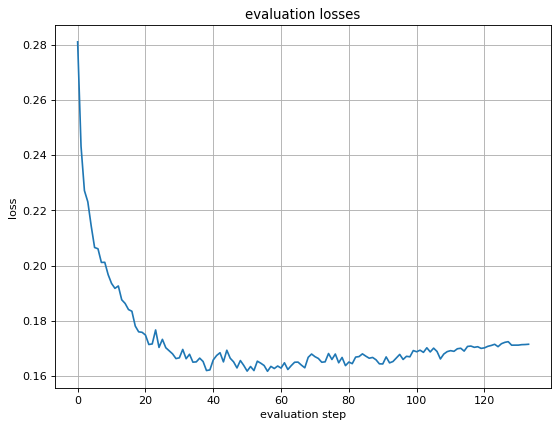

In [4]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6), dpi=80)
plt.grid()
plt.title('evaluation losses')
plt.xlabel('evaluation step')
plt.ylabel('loss')
plt.plot(eval_losses)
